In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fish_df = pd.read_csv('./dataset/Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


- **Length1 Length 2 Length3** Column rename -> **Vertical, Diagonal, Cross**

In [3]:
fish_df.rename(columns = {'Length1':'Vertical', 'Length2':'Diagonal','Length3':'Cross'},inplace=True)
fish_df.describe()

,Weight,Vertical,Diagonal,Cross,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


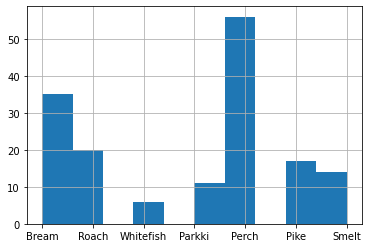

In [4]:
fish_df['Species'].hist()

In [5]:
fish_number = {
    'Bream':1, 'Roach': 2, 'Whitefish':3, 'Parkki':4, 'Perch': 5, 'Pike': 6, 'Smelt': 7
}

for data in fish_df['Species'].unique():
    fish_df['Species'][fish_df['Species'] == data] = fish_number[data]

fish_df['Species'] = pd.to_numeric(fish_df['Species'])

<ipython-input-5-cbd964e3dfe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish_df['Species'][fish_df['Species'] == data] = fish_number[data]


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=10, test_size=0.2)
for train_index, test_index in split.split(fish_df, fish_df["Species"]):
    strat_train_set = fish_df.loc[train_index]
    strat_test_set = fish_df.loc[test_index]

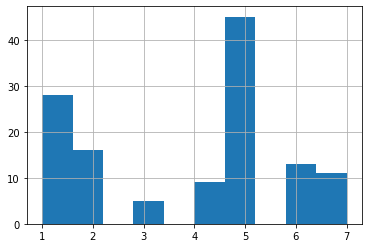

In [7]:
strat_train_set['Species'].hist()

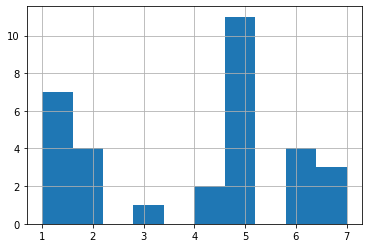

In [8]:
strat_test_set['Species'].hist()

In [9]:
X_train, y_train = strat_train_set[['Weight','Vertical','Diagonal','Cross','Height','Width']].values, strat_train_set['Species'].values
X_test, y_test = strat_test_set[['Weight','Vertical','Diagonal','Cross','Height','Width']].values, strat_test_set[['Species']].values